In [1]:
 import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
product_name=[]
 pprices=[]
properties=[]
description=[]

In [5]:
for i in range(2,50): 
    url="https://www.flipkart.com/search?q=mobiles+under+50000&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_15_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles+under+50000%7CMobiles&requestId=da1e0134-c739-4754-a310-e4e869b26ea2&page="+str(i)
# Define a browser-like User Agent
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

# Make the request with the custom User Agent
    r = requests.get(url, headers=headers)
    soup=BeautifulSoup(r.text,'lxml')
    names=soup.find_all("div",class_="KzDlHZ")
    for i in names:
        name=i.text
        product_name.append(name)
    prices=soup.find_all("div",class_="Nx9bqj _4b5DiR")
    for i in prices:
        name=i.text
        pprices.append(name)
    desc=soup.find_all("ul",class_="G4BRas")

    for i in desc:
        name=i.text
        description.append(name)

In [332]:

data=pd.DataFrame({"product_name":pd.Series(product_name),"prices":pd.Series(pprices),"Description":pd.Series(description)})

In [334]:
data.to_csv("D:/5th semester subjects/flipkartphones.csv")


In [336]:
print(len(pprices[:]))

960


In [338]:
data

,product_name,prices,Description
0,"OnePlus Nord 5 5G (Phantom Grey, 256 GB)","₹34,143",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...
1,"OPPO Reno14 5G (Forest Green, 512 GB)","₹42,999",12 GB RAM | 512 GB ROM16.74 cm (6.59 inch) Dis...
2,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,"₹11,999",4 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...
3,"Samsung Galaxy A55 5G (Awesome Iceblue, 256 GB)","₹38,990",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...
4,"vivo T4 Ultra 5G (Meteor Grey, 512 GB)","₹41,999",12 GB RAM | 512 GB ROM16.94 cm (6.67 inch) Ful...
...,...,...,...
955,"Infinix GT 30 Pro 5G+ (Dark Flare, 256 GB)","₹26,999",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Dis...
956,"REDMI Note 14 5G (Mystique White, 128 GB)","₹15,330",6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...
957,"Samsung Galaxy A55 5G (Awesome Navy, 128 GB)","₹27,990",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
958,"realme C75 5G (Lily White, 128 GB)","₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...


In [340]:
data.isnull().sum()

product_name    0
prices          0
Description     0
dtype: int64

In [342]:
data['product_name']=data['product_name'].str.split(' ').str.slice(0,1).str.join(' ')

In [344]:
data

,product_name,prices,Description
0,OnePlus,"₹34,143",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...
1,OPPO,"₹42,999",12 GB RAM | 512 GB ROM16.74 cm (6.59 inch) Dis...
2,OPPO,"₹11,999",4 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...
3,Samsung,"₹38,990",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...
4,vivo,"₹41,999",12 GB RAM | 512 GB ROM16.94 cm (6.67 inch) Ful...
...,...,...,...
955,Infinix,"₹26,999",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Dis...
956,REDMI,"₹15,330",6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...
957,Samsung,"₹27,990",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
958,realme,"₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...


In [346]:
desc_split = data['Description'].str.split('|', expand=True)

# Assign to new columns after cleaning
data['RAM'] = desc_split[0].str.strip()
data['ROM'] = desc_split[1].str.strip()
data['Display_Size'] = desc_split[2].str.strip().str.replace(' Display', '', regex=False)



In [348]:
data

,product_name,prices,Description,RAM,ROM,Display_Size
0,OnePlus,"₹34,143",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...,12 GB RAM,256 GB ROM17.35 cm (6.83 inch) Display50MP Rea...,None
1,OPPO,"₹42,999",12 GB RAM | 512 GB ROM16.74 cm (6.59 inch) Dis...,12 GB RAM,512 GB ROM16.74 cm (6.59 inch) Display50MP + 8...,50MP Front Camera6000 mAh BatteryDimensity 835...
2,OPPO,"₹11,999",4 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,4 GB RAM,128 GB ROM,Expandable Upto 2 TB16.94 cm (6.67 inch) HD+50...
3,Samsung,"₹38,990",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...,8 GB RAM,256 GB ROM,Expandable Upto 1 TB16.76 cm (6.6 inch) Full H...
4,vivo,"₹41,999",12 GB RAM | 512 GB ROM16.94 cm (6.67 inch) Ful...,12 GB RAM,512 GB ROM16.94 cm (6.67 inch) Full HD+ AMOLED...,32MP Front Camera5500 mAh BatteryDimensity 930...
...,...,...,...,...,...,...
955,Infinix,"₹26,999",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Dis...,12 GB RAM,256 GB ROM17.22 cm (6.78 inch) Display108MP + 8MP,13MP Front Camera5500 mAh BatteryDimensity 835...
956,REDMI,"₹15,330",6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...,6 GB RAM,128 GB ROM16.94 cm (6.67 inch) Display50MP Rea...,None
957,Samsung,"₹27,990",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,8 GB RAM,128 GB ROM,Expandable Upto 1 TB16.76 cm (6.6 inch) Full H...
958,realme,"₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,6 GB RAM,128 GB ROM,Expandable Upto 2 TB16.94 cm (6.67 inch) HD+32...


In [350]:
# Extract RAM (e.g., "12 GB RAM")
data['RAM'] = data['Description'].str.extract(r'(\d+\s*GB RAM)')

# Extract ROM (e.g., "512 GB ROM")
data['ROM'] = data['Description'].str.extract(r'(\d+\s*GB ROM)')

# Extract Display Size (e.g., "16.64 cm (6.55 inch)")
data['Display_Size'] = data['Description'].str.extract(r'(\d+\.\d+\s*cm\s*\([^)]+\))')

# Extract Camera (handles both "Rear Camera" and "Front Camera")
data['Camera'] = data['Description'].str.extract(r'([\d+MP\s\+\&]+(?:Rear|Front)\sCamera)')

# Extract Battery (e.g., "5000 mAh Battery")
data['Battery'] = data['Description'].str.extract(r'(\d+\s*mAh\s*Battery)')

In [352]:
data

,product_name,prices,Description,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,"₹34,143",12 GB RAM | 256 GB ROM17.35 cm (6.83 inch) Dis...,12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50MP Rear Camera,6800 mAh Battery
1,OPPO,"₹42,999",12 GB RAM | 512 GB ROM16.74 cm (6.59 inch) Dis...,12 GB RAM,512 GB ROM,16.74 cm (6.59 inch),50MP Front Camera,6000 mAh Battery
2,OPPO,"₹11,999",4 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,4 GB RAM,128 GB ROM,16.94 cm (6.67 inch),8MP Front Camera,6000 mAh Battery
3,Samsung,"₹38,990",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB16...,8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000 mAh Battery
4,vivo,"₹41,999",12 GB RAM | 512 GB ROM16.94 cm (6.67 inch) Ful...,12 GB RAM,512 GB ROM,16.94 cm (6.67 inch),32MP Front Camera,5500 mAh Battery
...,...,...,...,...,...,...,...,...
955,Infinix,"₹26,999",12 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Dis...,12 GB RAM,256 GB ROM,17.22 cm (6.78 inch),13MP Front Camera,5500 mAh Battery
956,REDMI,"₹15,330",6 GB RAM | 128 GB ROM16.94 cm (6.67 inch) Disp...,6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),50MP Rear Camera,5110 mAh Battery
957,Samsung,"₹27,990",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,8 GB RAM,128 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000 mAh Battery
958,realme,"₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),32MP Rear Camera,6000 mAh Battery


In [354]:
data=data.drop(columns=['Description'])

In [356]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,"₹34,143",12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50MP Rear Camera,6800 mAh Battery
1,OPPO,"₹42,999",12 GB RAM,512 GB ROM,16.74 cm (6.59 inch),50MP Front Camera,6000 mAh Battery
2,OPPO,"₹11,999",4 GB RAM,128 GB ROM,16.94 cm (6.67 inch),8MP Front Camera,6000 mAh Battery
3,Samsung,"₹38,990",8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000 mAh Battery
4,vivo,"₹41,999",12 GB RAM,512 GB ROM,16.94 cm (6.67 inch),32MP Front Camera,5500 mAh Battery
...,...,...,...,...,...,...,...
955,Infinix,"₹26,999",12 GB RAM,256 GB ROM,17.22 cm (6.78 inch),13MP Front Camera,5500 mAh Battery
956,REDMI,"₹15,330",6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),50MP Rear Camera,5110 mAh Battery
957,Samsung,"₹27,990",8 GB RAM,128 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000 mAh Battery
958,realme,"₹13,999",6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),32MP Rear Camera,6000 mAh Battery


In [358]:
data.isnull().sum()

product_name      0
prices            0
RAM             199
ROM             168
Display_Size      3
Camera           30
Battery         146
dtype: int64

In [360]:
data['Battery'] = (
    data['Battery']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)


In [362]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,"₹34,143",12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50MP Rear Camera,6800.0
1,OPPO,"₹42,999",12 GB RAM,512 GB ROM,16.74 cm (6.59 inch),50MP Front Camera,6000.0
2,OPPO,"₹11,999",4 GB RAM,128 GB ROM,16.94 cm (6.67 inch),8MP Front Camera,6000.0
3,Samsung,"₹38,990",8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000.0
4,vivo,"₹41,999",12 GB RAM,512 GB ROM,16.94 cm (6.67 inch),32MP Front Camera,5500.0
...,...,...,...,...,...,...,...
955,Infinix,"₹26,999",12 GB RAM,256 GB ROM,17.22 cm (6.78 inch),13MP Front Camera,5500.0
956,REDMI,"₹15,330",6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),50MP Rear Camera,5110.0
957,Samsung,"₹27,990",8 GB RAM,128 GB ROM,16.76 cm (6.6 inch),32MP Front Camera,5000.0
958,realme,"₹13,999",6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),32MP Rear Camera,6000.0


In [364]:
data['Camera'] = (
    data['Camera']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [366]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,"₹34,143",12 GB RAM,256 GB ROM,17.35 cm (6.83 inch),50.0,6800.0
1,OPPO,"₹42,999",12 GB RAM,512 GB ROM,16.74 cm (6.59 inch),50.0,6000.0
2,OPPO,"₹11,999",4 GB RAM,128 GB ROM,16.94 cm (6.67 inch),8.0,6000.0
3,Samsung,"₹38,990",8 GB RAM,256 GB ROM,16.76 cm (6.6 inch),32.0,5000.0
4,vivo,"₹41,999",12 GB RAM,512 GB ROM,16.94 cm (6.67 inch),32.0,5500.0
...,...,...,...,...,...,...,...
955,Infinix,"₹26,999",12 GB RAM,256 GB ROM,17.22 cm (6.78 inch),13.0,5500.0
956,REDMI,"₹15,330",6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),50.0,5110.0
957,Samsung,"₹27,990",8 GB RAM,128 GB ROM,16.76 cm (6.6 inch),32.0,5000.0
958,realme,"₹13,999",6 GB RAM,128 GB ROM,16.94 cm (6.67 inch),32.0,6000.0


In [368]:
data['Display_Size'] = (
    data['Display_Size']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [370]:
data['ROM'] = (
    data['ROM']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [372]:
data.isnull().sum()

product_name      0
prices            0
RAM             199
ROM             168
Display_Size      3
Camera           47
Battery         146
dtype: int64

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  960 non-null    object 
 1   prices        960 non-null    object 
 2   RAM           761 non-null    object 
 3   ROM           792 non-null    float64
 4   Display_Size  957 non-null    float64
 5   Camera        913 non-null    float64
 6   Battery       814 non-null    float64
dtypes: float64(4), object(3)
memory usage: 52.6+ KB


In [376]:
data['prices'] = data['prices'].str.replace(r'[^0-9]', '', regex=True).astype(int)

In [378]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,34143,12 GB RAM,256.0,17.0,50.0,6800.0
1,OPPO,42999,12 GB RAM,512.0,16.0,50.0,6000.0
2,OPPO,11999,4 GB RAM,128.0,16.0,8.0,6000.0
3,Samsung,38990,8 GB RAM,256.0,16.0,32.0,5000.0
4,vivo,41999,12 GB RAM,512.0,16.0,32.0,5500.0
...,...,...,...,...,...,...,...
955,Infinix,26999,12 GB RAM,256.0,17.0,13.0,5500.0
956,REDMI,15330,6 GB RAM,128.0,16.0,50.0,5110.0
957,Samsung,27990,8 GB RAM,128.0,16.0,32.0,5000.0
958,realme,13999,6 GB RAM,128.0,16.0,32.0,6000.0


In [380]:
data['RAM'] = (
    data['RAM']
    .fillna('')                                  # handle NaN
    .str.extract(r'(\d+)')[0]                    # extract numbers
    .astype(float)                               # convert to float (works with NaN)
)



In [382]:
pd.get_dummies(data,columns=['product_name'],drop_first=True)

,prices,RAM,ROM,Display_Size,Camera,Battery,product_name_ANGAGE,product_name_ASUS,product_name_Ai+,product_name_Alcatel,...,product_name_Tecno,product_name_XOLO,product_name_Xiaomi,product_name_amaq,product_name_hmd,product_name_itel,product_name_mobiistar,product_name_realme,product_name_ringme,product_name_vivo
0,34143,12.0,256.0,17.0,50.0,6800.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,42999,12.0,512.0,16.0,50.0,6000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11999,4.0,128.0,16.0,8.0,6000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,38990,8.0,256.0,16.0,32.0,5000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,41999,12.0,512.0,16.0,32.0,5500.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,26999,12.0,256.0,17.0,13.0,5500.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
956,15330,6.0,128.0,16.0,50.0,5110.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
957,27990,8.0,128.0,16.0,32.0,5000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
958,13999,6.0,128.0,16.0,32.0,6000.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [384]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,34143,12.0,256.0,17.0,50.0,6800.0
1,OPPO,42999,12.0,512.0,16.0,50.0,6000.0
2,OPPO,11999,4.0,128.0,16.0,8.0,6000.0
3,Samsung,38990,8.0,256.0,16.0,32.0,5000.0
4,vivo,41999,12.0,512.0,16.0,32.0,5500.0
...,...,...,...,...,...,...,...
955,Infinix,26999,12.0,256.0,17.0,13.0,5500.0
956,REDMI,15330,6.0,128.0,16.0,50.0,5110.0
957,Samsung,27990,8.0,128.0,16.0,32.0,5000.0
958,realme,13999,6.0,128.0,16.0,32.0,6000.0


In [386]:
data.isnull().sum()

product_name      0
prices            0
RAM             199
ROM             168
Display_Size      3
Camera           47
Battery         146
dtype: int64

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 900x1900 with 0 Axes>

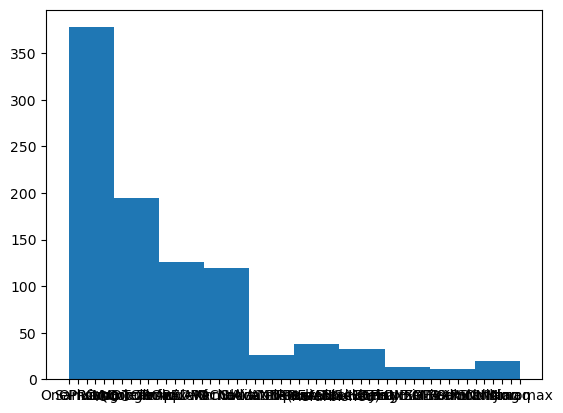

<Figure size 900x1900 with 0 Axes>

In [390]:
plt.hist(data["product_name"] )
plt.figure(figsize=(9,19))

In [392]:
data

,product_name,prices,RAM,ROM,Display_Size,Camera,Battery
0,OnePlus,34143,12.0,256.0,17.0,50.0,6800.0
1,OPPO,42999,12.0,512.0,16.0,50.0,6000.0
2,OPPO,11999,4.0,128.0,16.0,8.0,6000.0
3,Samsung,38990,8.0,256.0,16.0,32.0,5000.0
4,vivo,41999,12.0,512.0,16.0,32.0,5500.0
...,...,...,...,...,...,...,...
955,Infinix,26999,12.0,256.0,17.0,13.0,5500.0
956,REDMI,15330,6.0,128.0,16.0,50.0,5110.0
957,Samsung,27990,8.0,128.0,16.0,32.0,5000.0
958,realme,13999,6.0,128.0,16.0,32.0,6000.0


In [394]:
data['product_name']= data['product_name'].str.lower()


In [396]:
data['product_name']=data['product_name'].replace(['mi','readmi','xiaomi'],'readmi')

In [398]:
data.describe()

,prices,RAM,ROM,Display_Size,Camera,Battery
count,960.000000,761.000000,792.000000,957.000000,913.000000,814.000000
mean,22786.842708,7.568988,180.292929,41.144201,23.894852,4563.429975
std,23777.449219,2.911101,108.028535,584.763708,19.259877,1796.810941
min,498.000000,1.000000,4.000000,1.000000,0.000000,700.000000
25%,8285.500000,6.000000,128.000000,15.000000,8.000000,4332.500000
50%,16678.000000,8.000000,128.000000,16.000000,16.000000,5000.000000
75%,32999.000000,8.000000,256.000000,17.000000,32.000000,5500.000000
max,216999.000000,16.000000,512.000000,12812.000000,108.000000,7300.000000


In [400]:
data['product_name'].value_counts()

product_name
samsung          142
realme            90
vivo              90
motorola          76
oppo              66
poco              45
redmi             45
infinix           45
oneplus           43
kechaoda          41
apple             27
iqoo              27
nokia             26
tecno             19
mtr               17
itel              16
asus              15
readmi            11
nothing           10
pear              10
lava              10
google            10
lvix               8
hotline            6
ringme             5
jio                5
blackzone          5
angage             4
ai+                4
hmd                4
karbonn            3
jmax               3
gfive              3
panasonic          3
coolpad            3
sia                3
sony               2
salora             2
siavantage         2
alcatel            2
blackberry         2
(refurbished)      2
nexus              2
xolo               1
maxx               1
foneme             1
mobiistar          1


In [402]:
data["RAM"]=data['RAM'].fillna(data["RAM"].mean())

In [404]:
data["ROM"]=data['ROM'].fillna(data["ROM"].mean())
data["Display_Size"]=data['Display_Size'].fillna(data["Display_Size"].mean())
data["Camera"]=data['Camera'].fillna(data["Camera"].median())
data["Battery"]=data['Battery'].fillna(data["Battery"].median())

In [406]:
rare_values = data['product_name'].value_counts()[data['product_name'].value_counts() <=8].index

# Step 2: Replace them with 'Other'
data['product_name'] = data['product_name'].replace(rare_values, 'Other')



In [408]:
data=pd.get_dummies(data,columns=['product_name'],drop_first=True)

In [410]:
data.isnull().sum()

prices                   0
RAM                      0
ROM                      0
Display_Size             0
Camera                   0
Battery                  0
product_name_apple       0
product_name_asus        0
product_name_google      0
product_name_infinix     0
product_name_iqoo        0
product_name_itel        0
product_name_kechaoda    0
product_name_lava        0
product_name_motorola    0
product_name_mtr         0
product_name_nokia       0
product_name_nothing     0
product_name_oneplus     0
product_name_oppo        0
product_name_pear        0
product_name_poco        0
product_name_readmi      0
product_name_realme      0
product_name_redmi       0
product_name_samsung     0
product_name_tecno       0
product_name_vivo        0
dtype: int64

<Axes: >

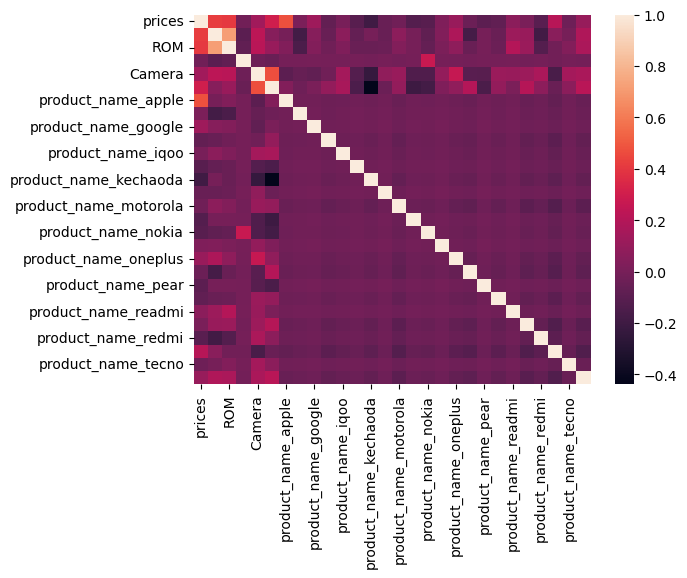

In [412]:
sns.heatmap(data.corr())

In [646]:
x=data.drop(columns='prices')
y=data['prices']

In [648]:
x

,RAM,ROM,Display_Size,Camera,Battery,product_name_apple,product_name_asus,product_name_google,product_name_infinix,product_name_iqoo,...,product_name_oneplus,product_name_oppo,product_name_pear,product_name_poco,product_name_readmi,product_name_realme,product_name_redmi,product_name_samsung,product_name_tecno,product_name_vivo
0,12.000000,256.0,17.0,50.0,6800.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,12.000000,512.0,16.0,50.0,6000.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,4.000000,128.0,16.0,8.0,6000.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,8.000000,256.0,16.0,32.0,5000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,12.000000,512.0,16.0,32.0,5500.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,12.000000,256.0,17.0,13.0,5500.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
956,6.000000,128.0,16.0,50.0,5110.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
957,8.000000,128.0,16.0,32.0,5000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
958,6.000000,128.0,16.0,32.0,6000.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [686]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [688]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [690]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [692]:
#from sklearn.preprocessing import PolynomialFeatures
#poly_reg=PolynomialFeatures(degree=2)
#x_train_poly=poly_reg.fit_transform(x_train)

In [694]:
#x_train_poly=poly_reg.transform(x_train)
#x_test_poly=poly_reg.transform(x_test)
#model=LinearRegression()
#model.fit(x_train_poly,y_train)

In [668]:
#gpred=model.predict(x_test_poly)

In [696]:
model.fit(x_train,y_train)

LinearRegression()

In [698]:
rpred=model.predict(x_test)

In [700]:
r2_score(y_test,rpred)

0.5953203457527931

In [678]:
from sklearn.svm import SVR

In [744]:
svr=SVR(kernel='linear',C=300,epsilon=8)
svr.fit(x_train,y_train)

SVR(C=300, epsilon=8, kernel='linear')

In [746]:
spred=svr.predict(x_test)

In [748]:
r2_score(y_test,spred)

0.5162958223248436

In [764]:
from sklearn.ensemble import RandomForestRegressor

In [770]:
regressor=RandomForestRegressor(n_estimators=100,criterion='squared_error')

In [772]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [774]:
randpred=regressor.predict(x_test)

In [776]:
r2_score(y_test,randpred)

0.8371367921229166